## read data

In [1]:
import pandas as pd

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics



In [2]:
def transform_categorical(df, caterogical_columns):
    transformer = make_column_transformer(
    (OneHotEncoder(), caterogical_columns),
    remainder='passthrough')
    transformed = transformer.fit_transform(df)
    transformed_df = pd.DataFrame(transformed)
    return transformed_df

In [43]:
def score(predicted, y_test):
    correct = 0
    incorrect = 0
    for i in range(len(predicted)):
        if predicted[i] == y_test[i]:
            correct += 1
        else:
            incorrect +=1
    score = correct / (correct + incorrect)
    return score

In [3]:
airline_passenger_satisfaction = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
DrugsABCXY = ['Sex', 'BP', 'Cholesterol']
stroke_prediction_dataset = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

## airline-passenger-satisfaction

In [4]:
train_df = pd.read_csv("data/airline-passenger-satisfaction/train.csv")
test_df = pd.read_csv("data/airline-passenger-satisfaction/test.csv")

train_df.pop("Unnamed: 0")
train_df.pop("id")
train_df = train_df.dropna()

test_df.pop("Unnamed: 0")
test_df.pop("id")
test_df = test_df.dropna()

y_train = train_df.pop('satisfaction')
y_test = test_df.pop('satisfaction')

train_df = transform_categorical(train_df, airline_passenger_satisfaction)
test_df = transform_categorical(test_df, airline_passenger_satisfaction)




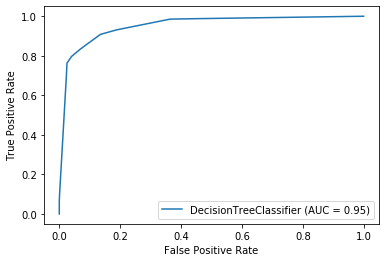

In [5]:
tree_airline_passenger_satisfaction = tree.DecisionTreeClassifier(max_depth = 4)
tree_airline_passenger_satisfaction.fit(train_df, y_train)
metrics.plot_roc_curve(tree_airline_passenger_satisfaction, test_df, y_test)



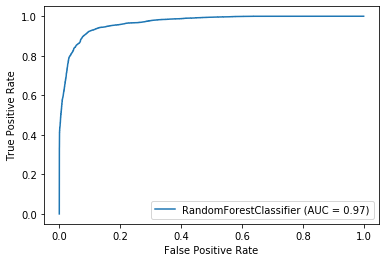

In [6]:

forest_airline_passenger_satisfaction = RandomForestClassifier(max_depth=4)
forest_airline_passenger_satisfaction.fit(train_df, y_train)
metrics.plot_roc_curve(forest_airline_passenger_satisfaction, test_df, y_test)

## stroke-prediction-dataset

In [7]:
train_df = pd.read_csv("data/stroke-prediction-dataset/train.csv")
test_df = pd.read_csv("data/stroke-prediction-dataset/test.csv")


train_df = train_df.dropna()
test_df = test_df.dropna()
train_number_rows = train_df.shape[0]

y_train = train_df.pop('stroke')
y_test = test_df.pop('stroke')

df = pd.concat([train_df, test_df])
df = transform_categorical(df, stroke_prediction_dataset)

train_df = df.iloc[:train_number_rows, :]
test_df = df.iloc[train_number_rows:, :]



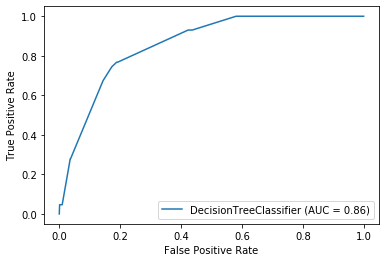

In [8]:
tree_stroke_prediction_dataset = tree.DecisionTreeClassifier(max_depth = 4)
tree_stroke_prediction_dataset.fit(train_df, y_train)
metrics.plot_roc_curve(tree_stroke_prediction_dataset, test_df, y_test)



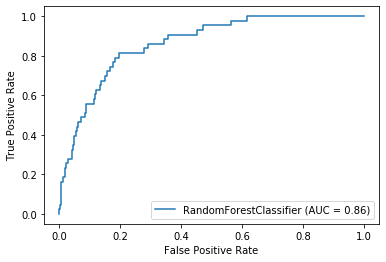

In [9]:
forest_stroke_prediction_dataset = RandomForestClassifier(max_depth=4)
forest_stroke_prediction_dataset.fit(train_df, y_train)
metrics.plot_roc_curve(forest_stroke_prediction_dataset, test_df, y_test)

## DrugsABCXY

In [29]:
train_df = pd.read_csv("data/DrugsABCXY/train.csv")
test_df = pd.read_csv("data/DrugsABCXY/test.csv")

y_train = train_df.pop('Drug')
y_test = test_df.pop('Drug')

train_df = transform_categorical(train_df, DrugsABCXY)
test_df = transform_categorical(test_df, DrugsABCXY)

0     drugC
1     drugC
2     drugC
3     drugY
4     drugY
5     drugX
6     drugC
7     drugX
8     drugY
9     drugC
10    drugA
11    drugC
12    drugA
13    drugX
14    drugX
15    drugX
16    drugY
17    drugX
18    drugY
19    drugX
20    drugA
21    drugY
22    drugY
23    drugA
24    drugY
25    drugY
26    drugC
27    drugY
28    drugA
29    drugY
30    drugY
31    drugY
32    drugX
33    drugY
34    drugY
35    drugY
36    drugY
37    drugX
38    drugA
39    drugY
Name: Drug, dtype: object

In [45]:
tree_drugsabcxy = tree.DecisionTreeClassifier(max_depth = 4)
tree_drugsabcxy.fit(train_df, y_train)

predicted = tree_drugsabcxy.predict(test_df)
score(predicted, y_test)

1.0

In [44]:
forest_drugsabcxy = RandomForestClassifier(max_depth=4)
forest_drugsabcxy.fit(train_df, y_train)

predicted = forest_drugsabcxy.predict(test_df)
score(predicted, y_test)


1.0

## mobile-price-classification

In [53]:
train_df = pd.read_csv("data/mobile-price-classification/train.csv")
test_df = pd.read_csv("data/mobile-price-classification/test.csv")

y_train = train_df.pop('price_range')
y_test = test_df.pop('price_range')

In [54]:
tree_mobile_price_classification = tree.DecisionTreeClassifier(max_depth = 4)
tree_mobile_price_classification.fit(train_df, y_train)

predicted = tree_mobile_price_classification.predict(test_df)
score(predicted, y_test)

0.8125

In [55]:
forest_mobile_price_classification = RandomForestClassifier(max_depth=4)
forest_mobile_price_classification.fit(train_df, y_train)

predicted = forest_mobile_price_classification.predict(test_df)
score(predicted, y_test)


0.8275

## wheat-seeds

In [61]:
train_df = pd.read_csv("data/wheat-seeds/train.csv")
test_df = pd.read_csv("data/wheat-seeds/test.csv")

y_train = train_df.pop('Type')
y_test = test_df.pop('Type')


Area               18.4500
Perimeter          16.1200
Compactness         0.8921
Kernel.Length       6.1070
Kernel.Width        3.7690
Asymmetry.Coeff     2.2350
Kernel.Groove       5.7940
Name: 1, dtype: float64

In [62]:
tree_wheat_seeds = tree.DecisionTreeClassifier(max_depth = 4)
tree_wheat_seeds.fit(train_df, y_train)

predicted = tree_wheat_seeds.predict(test_df)
score(predicted, y_test)

0.9

In [63]:
forest_wheat_seeds = RandomForestClassifier(max_depth=4)
forest_wheat_seeds.fit(train_df, y_train)

predicted = forest_wheat_seeds.predict(test_df)
score(predicted, y_test)

0.95

## winequality-red

In [68]:
train_df = pd.read_csv("data/winequality-red/train.csv")
test_df = pd.read_csv("data/winequality-red/test.csv")

y_train = train_df.pop('quality')
y_test = test_df.pop('quality')

fixed acidity           10.5000
volatile acidity         0.5100
citric acid              0.6400
residual sugar           2.4000
chlorides                0.1070
free sulfur dioxide      6.0000
total sulfur dioxide    15.0000
density                  0.9973
pH                       3.0900
sulphates                0.6600
alcohol                 11.8000
Name: 1, dtype: float64

In [69]:
tree_winequality_red = tree.DecisionTreeClassifier(max_depth = 4)
tree_winequality_red.fit(train_df, y_train)

predicted = tree_winequality_red.predict(test_df)
score(predicted, y_test)

0.5625

In [70]:
forest_winequality_red = RandomForestClassifier(max_depth=4)
forest_winequality_red.fit(train_df, y_train)

predicted = forest_winequality_red.predict(test_df)
score(predicted, y_test)

0.59375